In [ ]:
#MACROECONIMIC ANALISIS



import os
import pandas as pd
import matplotlib as plt
os.getcwd()

os.chdir('C:/Users/luisl/OneDrive/Documents/GitHub/ml_economics')

In [ ]:

# import data

data = pd.read_excel("C:/Users/luisl/OneDrive/Documents/GitHub/ml_economics/gdp_by_sector.xlsx",header=None) # creates a Pandas data frame for training set



**Divide dataset in 2010 and 2020**

In [ ]:

## divide dataset  in 2010 and 2020

#2010
df_2010 = data[[0,1,3,5,7]]

#transpose
df_2010=df_2010.transpose()

df_2010=df_2010.drop([1],axis=1)

#drop innecesary columns by index interval
df_2010=df_2010.drop(df_2010.iloc[:, 223:283], inplace = False, axis = 1)


#first row as index
df_2010=df_2010.rename(columns=df_2010.iloc[0])
#drop row
df_2010=df_2010.drop([0],axis=0)

#FIRST COLUMN AS ROW INDEX
df_2010=df_2010.set_index('SECTOR')

#transpose d enuevo
df_2010=df_2010.transpose()


#2020

df_2020 = data[[0,2,4,6,8]]
#transpose
df_2020=df_2020.transpose()

df_2020=df_2020.drop([1],axis=1)

#drop innecesary columns by index interval
df_2020=df_2020.drop(df_2020.iloc[:, 223:283], inplace = False, axis = 1)


#first row as index
df_2020=df_2020.rename(columns=df_2020.iloc[0])
#drop row
df_2020=df_2020.drop([0],axis=0)

#FIRST COLUMN AS ROW INDEX
df_2020=df_2020.set_index('SECTOR')


#transpose d enuevo
df_2020=df_2020.transpose()

**EDA**

In [ ]:

#####EDA###########
import seaborn as sns
import matplotlib.pyplot as plt


df_2010.describe





In [ ]:
df_2010.dtypes


In [ ]:
df_2010.columns


In [ ]:
df_2010.info()


In [ ]:
df_2010



In [ ]:
df_2010.shape

In [ ]:
df_2010['Agriculture'].describe

In [ ]:
df_2010.head()

In [ ]:
df_2010['Agriculture'].values[3]


In [ ]:
#eliminate ..
df_2010=df_2010.replace('..',0)


In [ ]:
df_2010.isin(['..']).any()

In [ ]:
#pasar todas las columnas a float
for i in df_2010.columns:
    df_2010[i]=pd.to_numeric(df_2010[i],errors='coerce')




In [ ]:
df_2010.info()


In [ ]:
df_2010


In [ ]:

#plots
print(df_2010['Agriculture'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_2010['Agriculture'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:

#plots
print(df_2010['Industry'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_2010['Industry'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:

#plots
print(df_2010['Manufacturing'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_2010['Manufacturing'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:

#plots
print(df_2010['Services'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_2010['Services'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
#plot de todos a la vez

df_2010.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:


#localizar filas con 0
rowss=df_2010.index.values.tolist()#lista de filas
cols= df_2010.columns#lsita de columnas
eliminar_com_0=[]
for row in rowss:
    for col in cols:
        if df_2010[col][row]==0:
            eliminar_com_0.append(row)
            

        
        
        

In [ ]:
eliminar_com_0


In [ ]:
#eliminar duplicados
from collections import OrderedDict
eliminar_com_0= list(OrderedDict.fromkeys(eliminar_com_0))

In [ ]:
eliminar_com_0

In [ ]:
#eliminar las filas con 0
for i in eliminar_com_0:
    df_2010=df_2010.drop([i],axis=0)

In [ ]:
df_2010

**FULL DATA CLEANING**

In [29]:
#eliminate ..
df_2020=df_2020.replace('..',0)

#pasar todas las columnas a float
for i in df_2020.columns:
    df_2020[i]=pd.to_numeric(df_2020[i],errors='coerce')
    
#localizar filas con 0
rowss=df_2020.index.values.tolist()#lista de filas
cols= df_2020.columns#lsita de columnas
eliminar_com_0=[]
for row in rowss:
    for col in cols:
        if df_2020[col][row]==0:
            eliminar_com_0.append(row)
            

#eliminar duplicados
from collections import OrderedDict
eliminar_com_0= list(OrderedDict.fromkeys(eliminar_com_0))


#eliminar las filas con 0
for i in eliminar_com_0:
    df_2020=df_2020.drop([i],axis=0)

##KMEANS

In [38]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans



codigo alternativo

from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_2010)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

range_n_clusters = list (range(2,10))


for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters).fit(df_2010)
    preds = clusterer.predict(df_2010)
    centers = clusterer.cluster_centers_
    score = silhouette_score(df_2010, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

no necesitamos es calalr los datos porque estan en la misma dimension

si fuera necesario:
# Scaling the data to keep the different attributes in same range.
    df_2010[df_2010.columns] = StandardScaler().fit_transform(df_2010)
    print(df_2010.describe())

##PCA

In [42]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_2010)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

# >> Explained variation per principal component: [0.36198848 0.1920749 ]

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))


Explained variation per principal component: [0.55488847 0.35562811]
Cumulative variance explained by 2 principal components: 91.05%


Gdrid search de n clusters con silhoute score

In [44]:
pca_2_

array([[ 3.11492252e+00,  1.65647849e+01],
       [ 6.84155743e+00,  1.09461273e+01],
       [ 2.40359586e+01, -7.69237207e+00],
       [ 2.46329578e+01, -1.11136139e+01],
       [-2.10348961e+01, -5.92809146e+00],
       [ 1.70485889e+00, -1.93108609e+00],
       [ 8.10874373e+00,  8.27179077e+00],
       [-2.02744688e+01, -6.65930256e+00],
       [-1.05170135e+01, -9.16976876e+00],
       [-6.68847913e+00, -1.02501750e+01],
       [ 3.95510839e+01, -1.07826416e+01],
       [-3.17305424e+01, -7.38167969e+00],
       [ 1.19220597e+01, -1.75432668e+01],
       [ 1.52901329e+00,  5.34892262e+00],
       [ 1.54246286e+01, -3.92838088e+00],
       [-1.41826011e+01, -9.63724659e+00],
       [-8.59827125e+00,  2.42772819e+00],
       [ 4.00410457e+00,  1.93874392e+01],
       [-4.08919269e+01, -7.95375430e+00],
       [ 2.41974052e+01,  7.44341888e-01],
       [ 1.03566080e+01,  1.59210970e+00],
       [-3.82415677e+00, -1.32538713e+00],
       [ 1.42365334e+00, -8.49730744e+00],
       [-4.

Parameter: {'n_clusters': 2} Score 0.3724359764934301
Parameter: {'n_clusters': 3} Score 0.45126223615399147
Parameter: {'n_clusters': 4} Score 0.39381653683792817
Parameter: {'n_clusters': 5} Score 0.37061313016195424
Parameter: {'n_clusters': 10} Score 0.3702031436510131
Parameter: {'n_clusters': 15} Score 0.38695562102622755
Parameter: {'n_clusters': 20} Score 0.3924979541096525
Parameter: {'n_clusters': 25} Score 0.3963828216272844
Parameter: {'n_clusters': 30} Score 0.3806167825620104
Parameter: {'n_clusters': 35} Score 0.3799107054376549
Parameter: {'n_clusters': 40} Score 0.38586779449375785


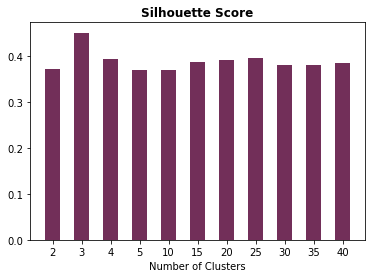

In [46]:
parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]

parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(pca_2_result)          
    ss = metrics.silhouette_score(pca_2_result, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

In [50]:
kmeans = KMeans(n_clusters=2)   
kmeans.fit(pca_2_result)

KMeans(n_clusters=2)

In [52]:
def visualizing_results(pca_result, label, centroids_pca):
    """ Visualizing the clusters
    :param pca_result: PCA applied data
    :param label: K Means labels
    :param centroids_pca: PCA format K Means centroids
    """
    # ------------------ Using Matplotlib for plotting-----------------------
    x = pca_result[:, 0]
    y = pca_result[:, 1]

    plt.scatter(x, y, c=label, alpha=0.5, s= 200)  # plot different colors per cluster
    plt.title('Wine clusters')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black", lw=1.5)

    plt.show()

In [53]:
visualizing_results(pca_2_result,label,centroids_pca)

NameError: name 'label' is not defined